In [1]:
### Se position dans le répertoire des données ###
setwd('../BData')

### chargement des paquets R pour lire et manipuler
## les données spatiales 
##library(sf) ## lecture et écriture de données vecteurs 
library(gstat) ## interpolation spatiale mécaniste (inverse distance) et statistique (géostatistique)
library(maptools) ## lecture de données vecteurs
library(rgdal)

Loading required package: sp

Checking rgeos availability: TRUE

rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: /usr/share/proj
Linking to sp version:1.4-2
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



In [2]:
#####################################################
## Charge l'ensemble des pts echantillonnes sur la zone atelier de Fenay
##mydata <- st_read("ptsampleFenayL93.shp")
##mydata <- readShapePoints("ptsampleFenayL93.shp")
mydata <- readOGR("ptsampleFenayL93.shp")
##affiche le header des données

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Reseau_Geodesique_Francais_1993 in CRS definition: +proj=lcc +lat_0=46.5 +lon_0=3 +lat_1=49 +lat_2=44 +x_0=700000 +y_0=6600000 +ellps=GRS80 +units=m +no_defs”


OGR data source with driver: ESRI Shapefile 
Source: "/home/thierry/works/R4R2D2C/BData/ptsampleFenayL93.shp", layer: "ptsampleFenayL93"
with 278 features
It has 26 fields


[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	278 obs. of  26 variables:
  .. ..$ no_site   : chr [1:278] "FE11_Py_100" "FE11_Py_101" "FE11_Py_102" "FE11_Py_103" ...
  .. ..$ Modalite_B: num [1:278] 11045 11120 11120 11209 11011 ...
  .. ..$ x         : num [1:278] 854843 858498 858283 855273 858068 ...
  .. ..$ y         : num [1:278] 6682797 6682798 6682798 6682798 6682798 ...
  .. ..$ SOC       : num [1:278] 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 25.9 ...
  .. ..$ TN        : num [1:278] 2.42 2.43 2.1 3.75 5.92 3.14 1.06 0.999 3.25 1.72 ...
  .. ..$ C_N       : num [1:278] 10.1 9.48 9.44 12 1.74 10.6 10.4 10.4 11.6 15 ...
  .. ..$ pH        : num [1:278] 8.1 7.5 7.51 8.06 8.25 8.2 6.78 7.75 8.13 4.83 ...
  .. ..$ CaCO3     : num [1:278] 132 1.5 1.9 366 2.3 708 1.7 1.7 578 0.001 ...
  .. ..$ Clay      : num [1:278] 34.3 42 40.3 33 31 21.4 27.3 24.3 23.2 29.1 ...
  .. ..$ Silt      : num [1:278] 50.7 50 48.1 56.9 63.4 64.2 64.8 69.

[1] 1.74

[1] 174

[1]   1.74 174.00

[1] 21.93691

[1] 15.76055

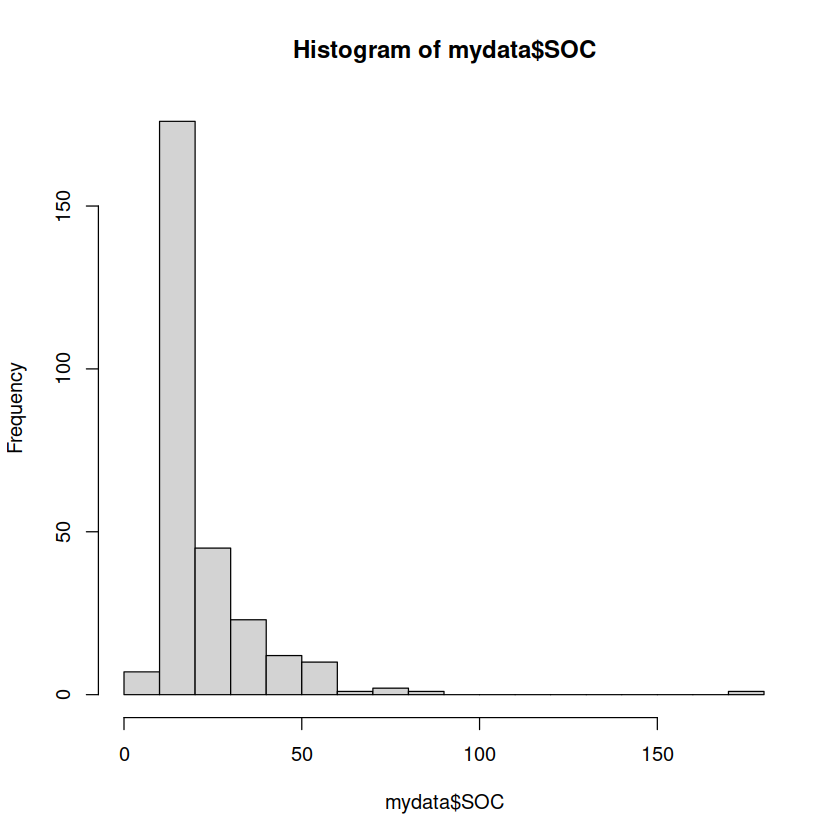

In [6]:
## type d'objet
class(mydata)
str(mydata)

## gamme et distribution des valeurs pour la variable SOC
hist(mydata$SOC,breaks=15)
min(mydata$SOC);max(mydata$SOC)
range(mydata$SOC)
mean(mydata$SOC);sd(mydata$SOC)

[1] 0.4036965


Call:
lm(formula = SOC ~ CaCO3, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.654  -6.583  -3.700   1.916 153.262 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.599332   0.978720  19.004  < 2e-16 ***
CaCO3        0.039467   0.005384   7.331 2.54e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.45 on 276 degrees of freedom
Multiple R-squared:  0.163,	Adjusted R-squared:  0.1599 
F-statistic: 53.74 on 1 and 276 DF,  p-value: 2.544e-12


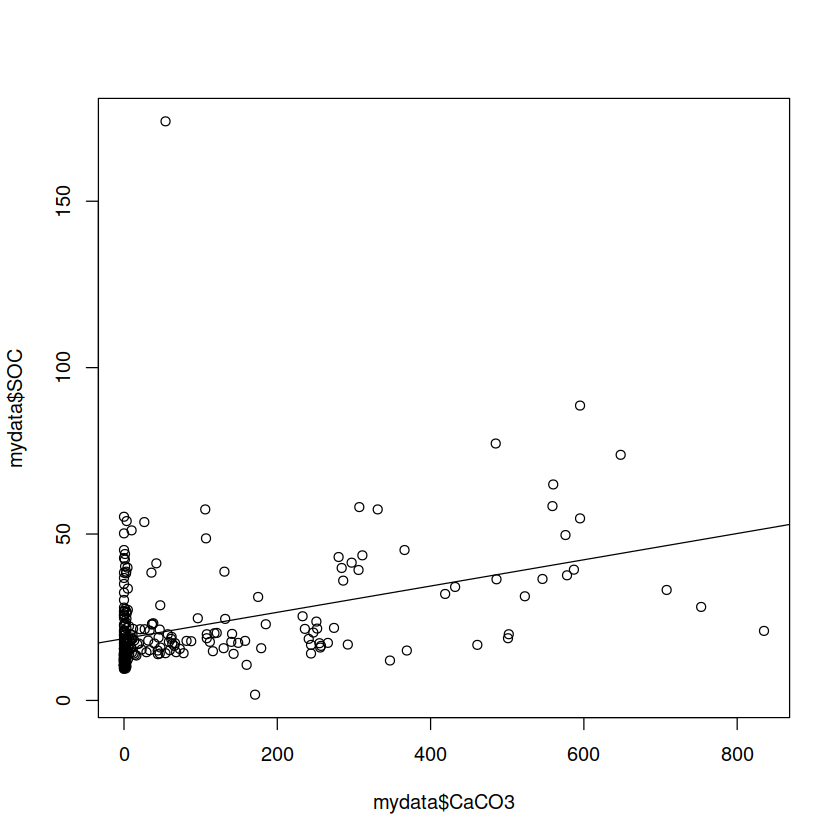

In [4]:
## scatterplot de SOC vs. CaCO3
plot(mydata$CaCO3,mydata$SOC)
cor(mydata$CaCO3,mydata$SOC)
mylm <- lm(SOC~CaCO3, data = mydata)
summary(mylm)
abline(mylm)

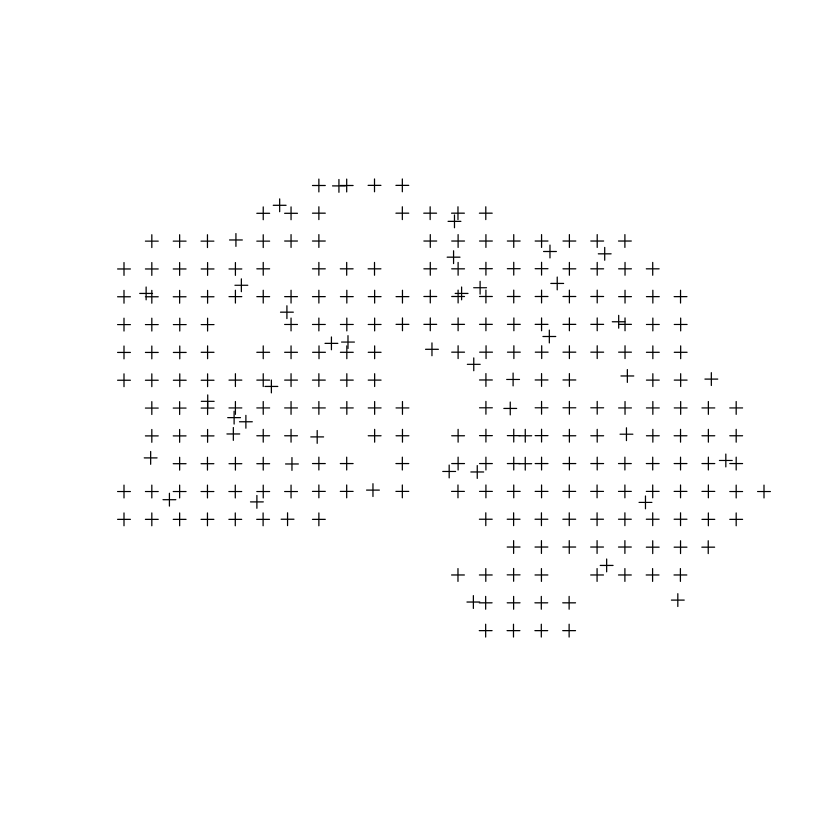

In [7]:
## Carte de la localisation des points échantillonnés

plot(mydata)

Loading required package: spatstat.data

Loading required package: nlme

Loading required package: rpart


spatstat 1.64-1       (nickname: ‘Help you I can, yes!’) 
For an introduction to spatstat, type ‘beginner’ 



Note: spatstat version 1.64-1 is out of date by more than 4 months; we recommend upgrading to the latest version.


Attaching package: ‘spatstat’


The following object is masked from ‘package:gstat’:

    idw




[1] "ppp"

List of 6
 $ window    :List of 4
  ..$ type  : chr "rectangle"
  ..$ xrange: num [1:2] 853767 858713
  ..$ yrange: num [1:2] 6681507 6684948
  ..$ units :List of 3
  .. ..$ singular  : chr "unit"
  .. ..$ plural    : chr "units"
  .. ..$ multiplier: num 1
  .. ..- attr(*, "class")= chr "unitname"
  ..- attr(*, "class")= chr "owin"
 $ n         : int 278
 $ x         : num [1:278] 854843 858498 858283 855273 858068 ...
 $ y         : num [1:278] 6682797 6682798 6682798 6682798 6682798 ...
 $ markformat: chr "vector"
 $ marks     : num [1:278] 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 25.9 ...
 - attr(*, "class")= chr "ppp"


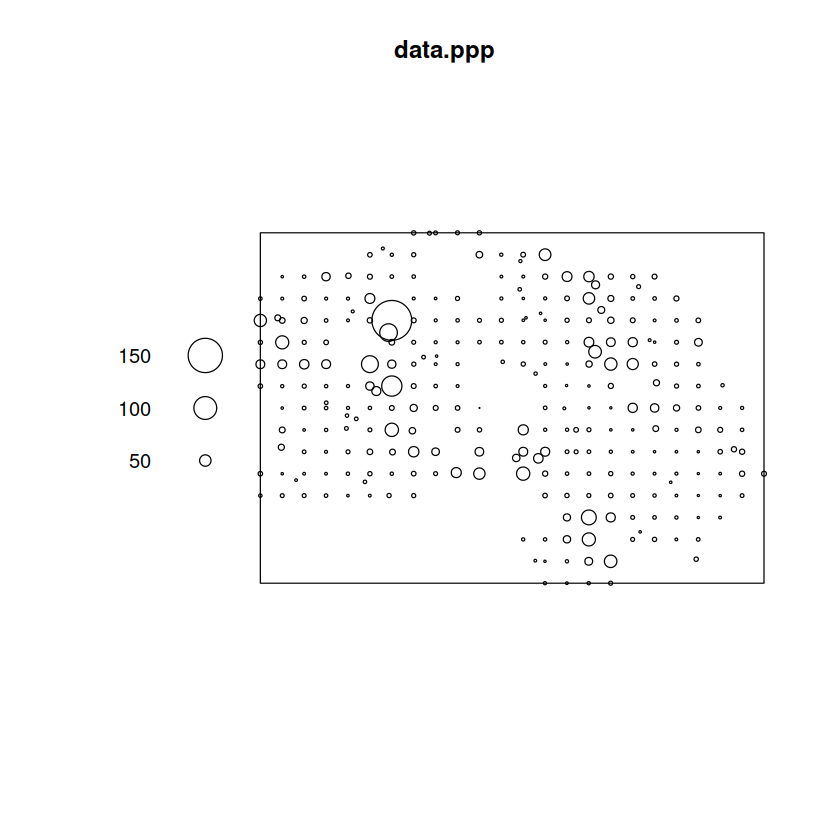

In [8]:
#################################################
##
## Répartition spatiale des données
## caractéristiques
##
#################################################
library(spatstat)
## création d'un objet ppp 
data.ppp <- as.ppp.SpatialPointsDataFrame(mydata['SOC'])
class(data.ppp)
str(data.ppp)
plot(data.ppp)

[1] 36.12478

[1] 5236.537

[1] 36.12478

[1] 224.183

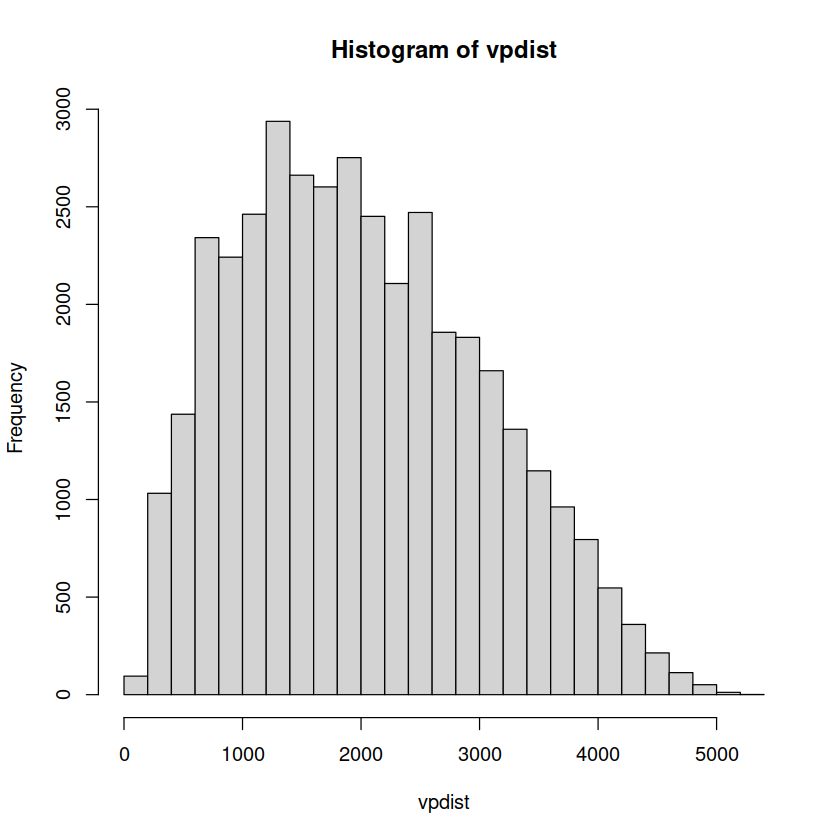

[1] 176.9482

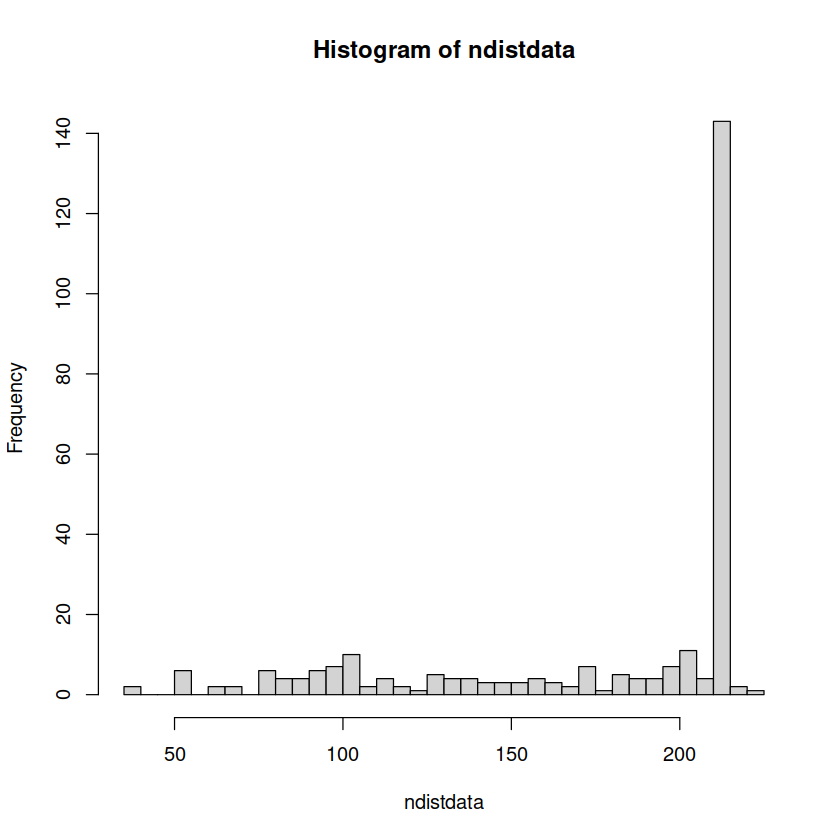

In [9]:
pdistdata <- pairdist(data.ppp) ## distance de l'ensemble des couples de points
ndistdata <- nndist(data.ppp) ## distance entre les plus proches voisins

## examen des distances avec statistique de base mean, min, max etc.
vpdist <- as.numeric(pdistdata[lower.tri(pdistdata)])
hist(vpdist,30)
min(vpdist); max(vpdist)

min(ndistdata); max(ndistdata)
hist(ndistdata,30)
mean(ndistdata)

[1] 480.7546

[1] 215

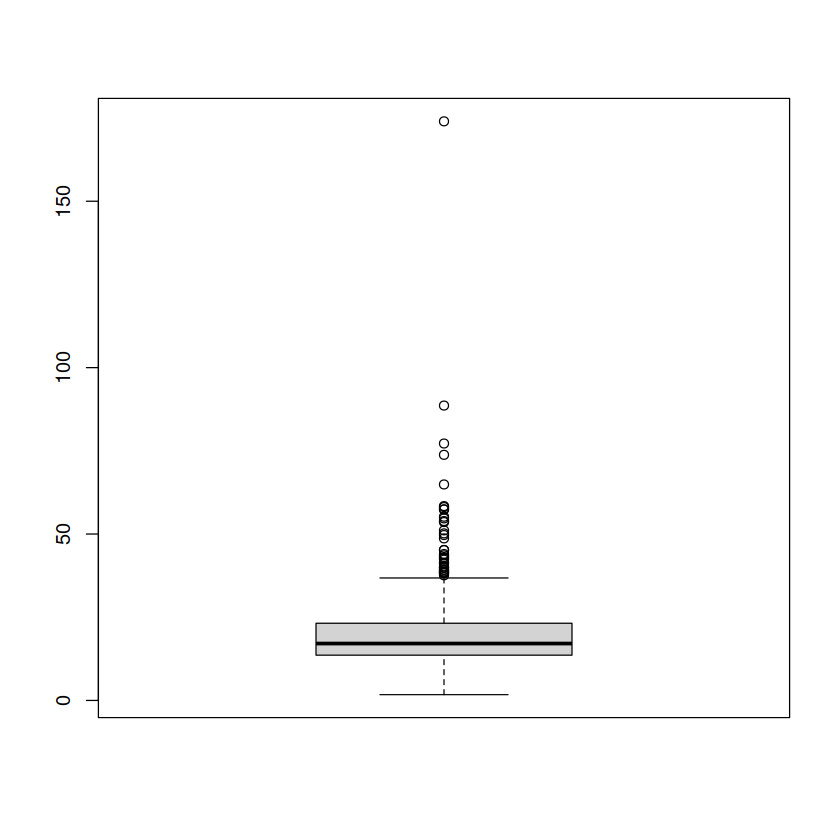

In [10]:
## Fonction pour calculer le mode
getmode <- function(v) {
    uniqv <- unique(v)
    uniqv[which.max(tabulate(match(v, uniqv)))]
}

getmode(vpdist)
getmode(ndistdata)

boxplot(mydata$SOC)

## Valeurs 'aberrantes' ?  remplacement par moyenne 
##mydata$SOC[which.max(mydata$SOC)] <- mean(mydata$SOC[-which.max(mydata$SOC)])

[1] 107

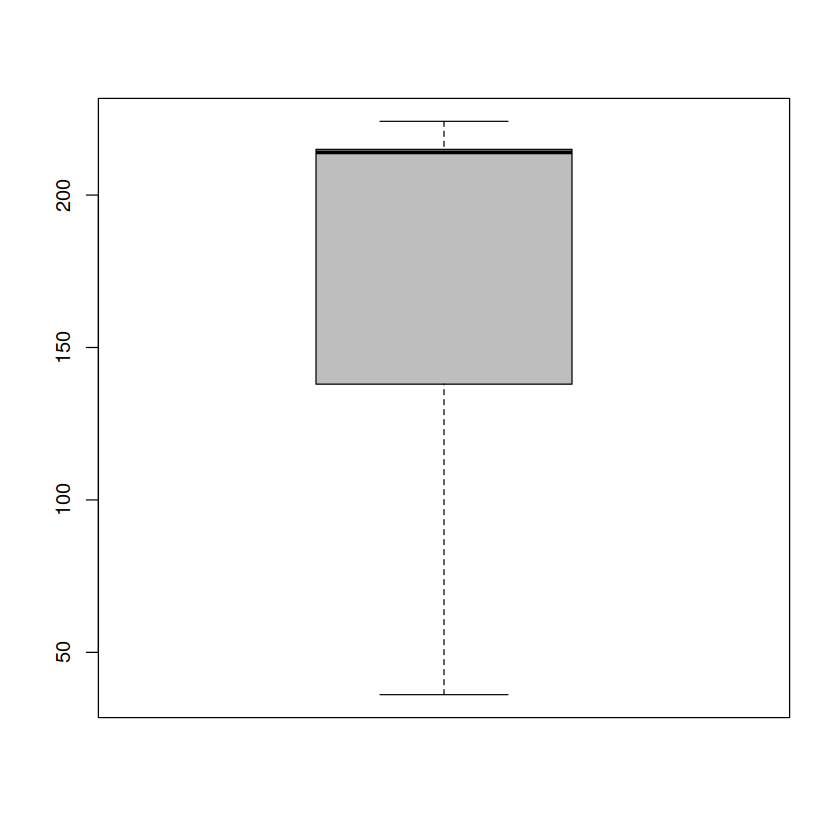

In [11]:
#########################################################################
## On cherche à interpoler par une méthode mécaniste -> inverse distance pondérée (IDW)
## 1- Quel grain pour la grille d'interpolation ?
## 2- Quel poids pour l'inverse distance ?
## 3- Quelle qualité globalle pour les données interpolées

######################################################
## 1- Grain pour l'interpolation
###################################################
###  Echantillon & résolution spatiale
##   cf. Hengl (2006) p1289, p1293-1294 
###################################################

## Méthode basée sur la densité de l'échantillon

mydata.area <- (mydata@bbox[1,2]-mydata@bbox[1,1])*(mydata@bbox[2,2]-mydata@bbox[2,1])

mydata.dens <- length(mydata$SOC)/mydata.area * 1e6    # observations / km^2
mydata.pixsize0 <- 0.0791 * sqrt(mydata.area/length(mydata$SOC))

## Méthode basée sur l'écartement des points (mean shortest distance)

dist.box <- boxplot(ndistdata, col="grey")

mydata.pixsize1 <- dist.box$stats[3]/2
mydata.pixsize2 <- qnorm(0.05, mean=mean(ndistdata), sd=sd(ndistdata), lower.tail=T)
mydata.pixsize3 <- quantile(ndistdata, probs=0.01)

(moypixelsize <- ceiling(mydata.pixsize1))

detach("package:spatstat")

Warning message in proj4string(mydata):
“CRS object has comment, which is lost in output”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on GRS80 ellipsoid in CRS definition”
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Reseau_Geodesique_Francais_1993 in CRS definition: +proj=lcc +lat_0=46.5 +lon_0=3 +lat_1=49 +lat_2=44 +x_0=700000 +y_0=6600000 +ellps=GRS80 +units=m +no_defs”


OGR data source with driver: ESRI Shapefile 
Source: "/home/thierry/works/R4R2D2C/BData/zone_Fenay.shp", layer: "zone_Fenay"
with 1 features
It has 4 fields
Integer64 fields read as strings:  gid 


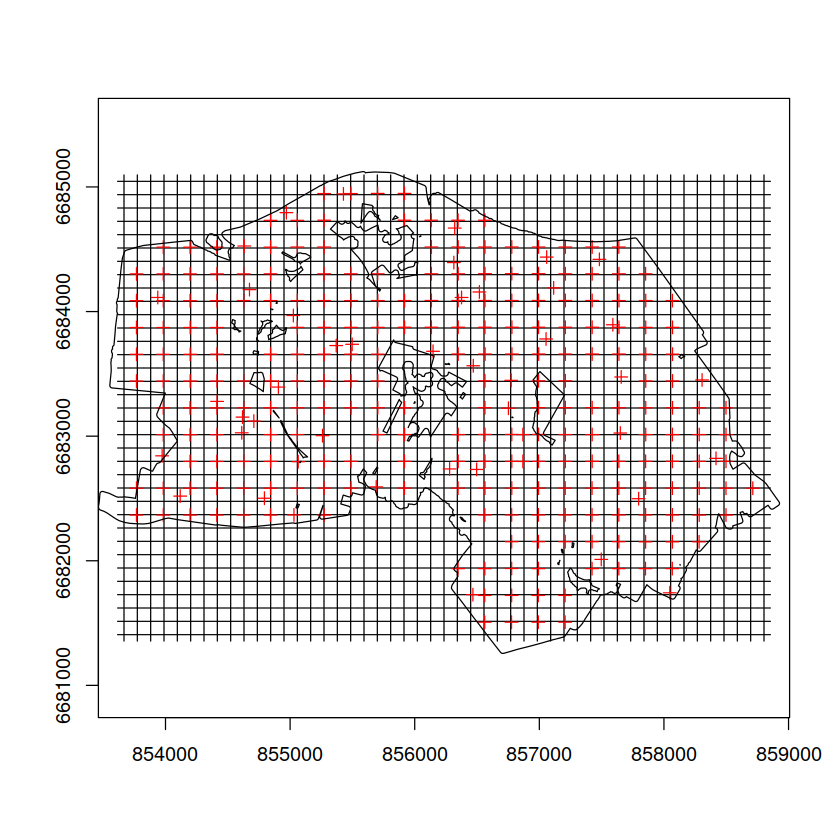

In [19]:
## création de la grille d'interpolation vide avec une zone tampon de 100m
## et une taille de pixel définit à partir des résultats précédents
fenaygrid <- expand.grid(
    lon = seq(
        bbox(mydata)[1] - 100, bbox(mydata)[3] + 100,
        moypixelsize
    ),
    lat = seq(
        bbox(mydata)[2] - 100, bbox(mydata)[4] + 100,
        moypixelsize
    )
)

## transformation de cette grille en un objet spatial partageant
## les mêmes characteristiques spatial (ref carto) que l'échantillon 
fenaygrid$myvar <- NA
coordinates(fenaygrid) <- ~ lon + lat
## fenaygrid <- as(fenaygrid, "SpatialPixelsDataFrame")
proj4string(fenaygrid) <- proj4string(mydata)

## Charge les limites de la zone
zoneFenay <- readOGR("zone_Fenay.shp")

plot(fenaygrid, axes = TRUE)
plot(mydata['SOC'], add = TRUE, col = "red")
plot(zoneFenay, add = TRUE)

Warning message in proj4string(d$data):
“CRS object has comment, which is lost in output”
Warning message in proj4string(newdata):
“CRS object has comment, which is lost in output”


[inverse distance weighted interpolation]


Warning message in proj4string(newdata):
“CRS object has comment, which is lost in output”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on GRS80 ellipsoid in CRS definition”
Warning message in proj4string(d$data):
“CRS object has comment, which is lost in output”
Warning message in proj4string(newdata):
“CRS object has comment, which is lost in output”


[inverse distance weighted interpolation]


Warning message in proj4string(newdata):
“CRS object has comment, which is lost in output”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on GRS80 ellipsoid in CRS definition”


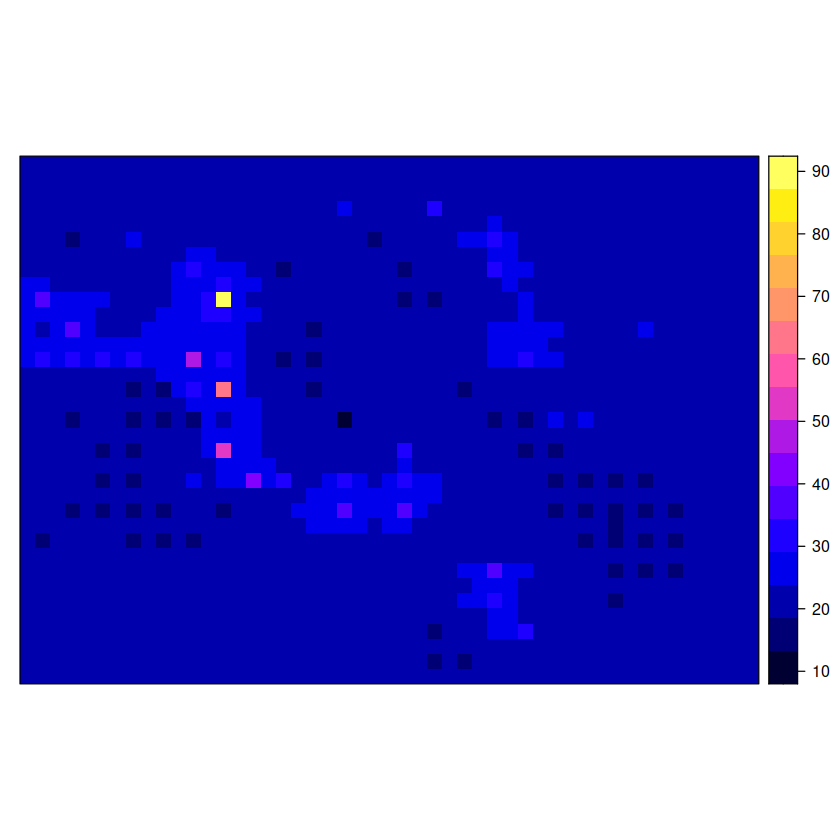

In [20]:
## Création de la fontion d'interpolation IDW avec le poids = 1
gs <- gstat(
    id = "SOC", formula = SOC ~ 1, data=mydata,
    set = list(idp = 1)
)

# Interpolate onto the prediction grid
idw.SOC <- idw(SOC ~ 1, mydata, fenaygrid, idp = 1)

soc_idw <- predict(gs, fenaygrid)
## transformation des point en une image avec des pixels
soc.grid  <- as(soc_idw, "SpatialPixelsDataFrame")
spplot(soc.grid["SOC.pred"])

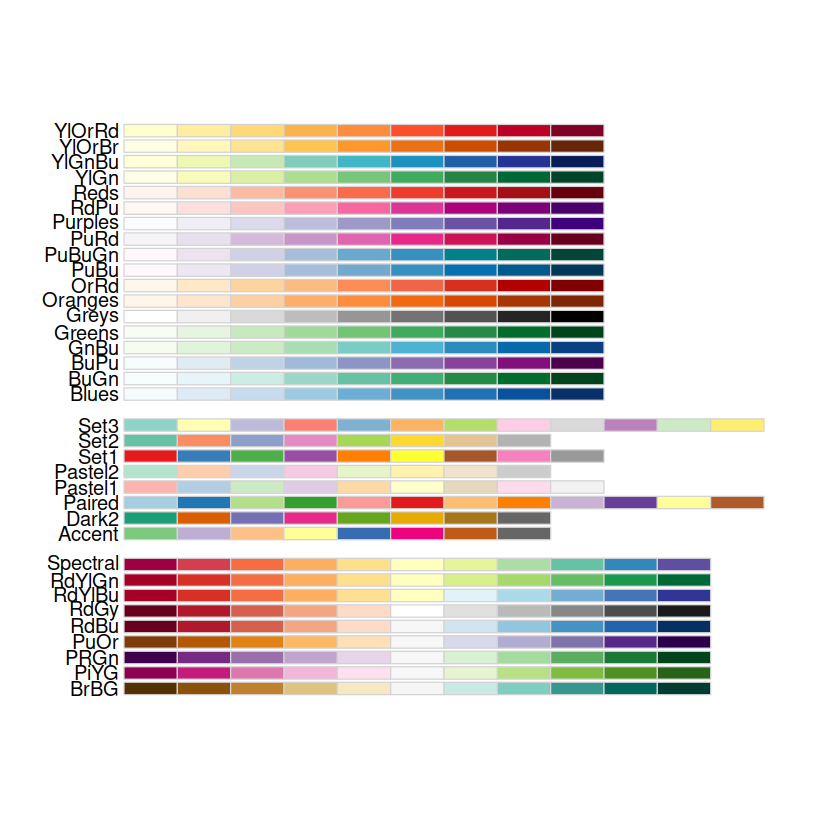

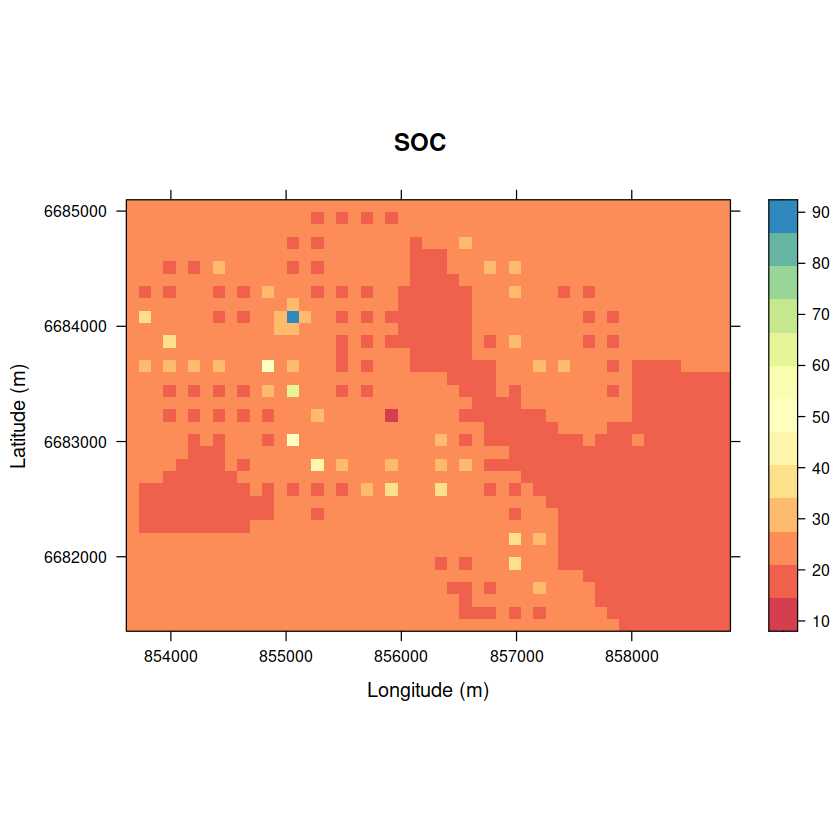

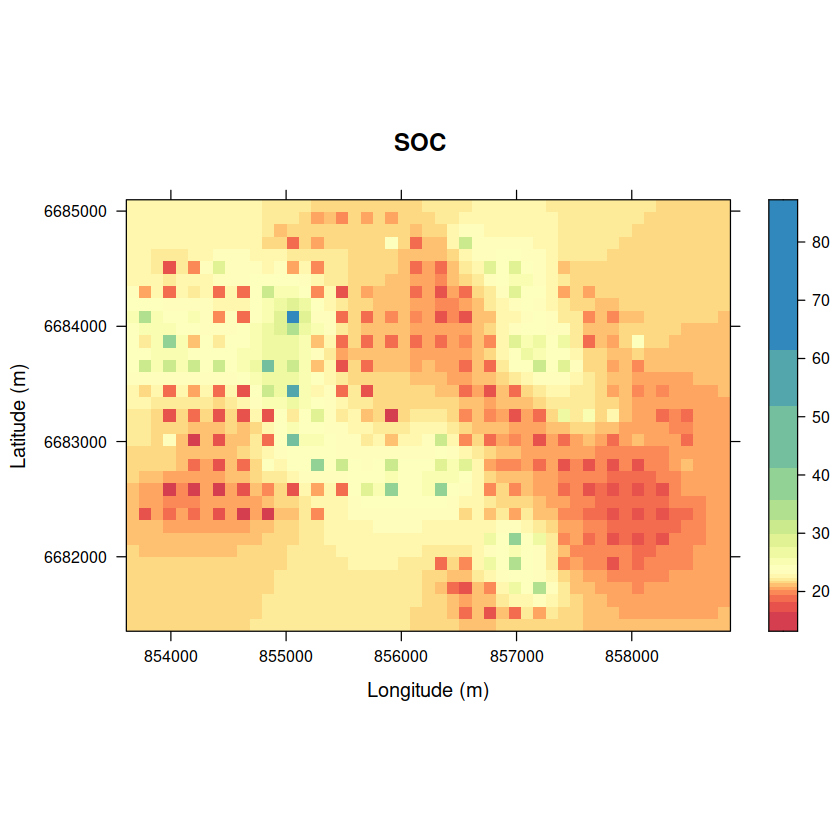

In [21]:
## Chargement de palettes de couleur
library(RColorBrewer)
display.brewer.all() ## affiche les palette de couleur qui sont disponibles
## création de la palette
col.regions <- colorRampPalette(brewer.pal(7, "Spectral"),
    interpolate = "spline"
)

spplot(soc.grid["SOC.pred"],
    col.regions = col.regions, cuts = 12,
    xlab = "Longitude (m)", ylab = "Latitude (m)",
    main = "SOC",
    scales = list(draw = TRUE)
)

## découpe la palette de couleur en fonction de la distribution des données
## ClassInt propose différente méthodes
library(classInt)
breaks.qt <- classIntervals(as.data.frame(soc.grid["SOC.pred"])$SOC.pred, n = 20,
                            style = "jenks")

spplot(soc.grid["SOC.pred"],
       col.regions = col.regions, at = breaks.qt$brks,
       xlab = "Longitude (m)", ylab = "Latitude (m)",
       main = "SOC",
       scales = list(draw = TRUE)
       )

In [27]:
options(warn=-1)
######################################################
## 2- ### choix de la puissance par minimisation de la RMSE
###################################################

## Fonction de calcul de la RMSE
do_cv <- function(idp, data) {
    v_idw <- gstat(
        id = "SOC", formula = SOC ~ 1,
        data = data, set = list(idp = idp)
    )
    out <- gstat.cv(v_idw, nmax = 50, nfold = 5, verbose = FALSE)
    return(sqrt(mean(out$residual^2))) # RMSE comme critère d'optimisation
}

## Application de la fonction de calcul de la RMSE pour une gamme de puissance
## de 0.1 à 5
idw_pow <- seq(0.1, 5, by = 0.1) ## Gamme testée pour la puissance
cv_vals <- sapply(idw_pow, do_cv, data = mydata) # calcul de rmse

print(powoptim <- data.frame(idp = idw_pow, cv_rmse = cv_vals))


[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpo

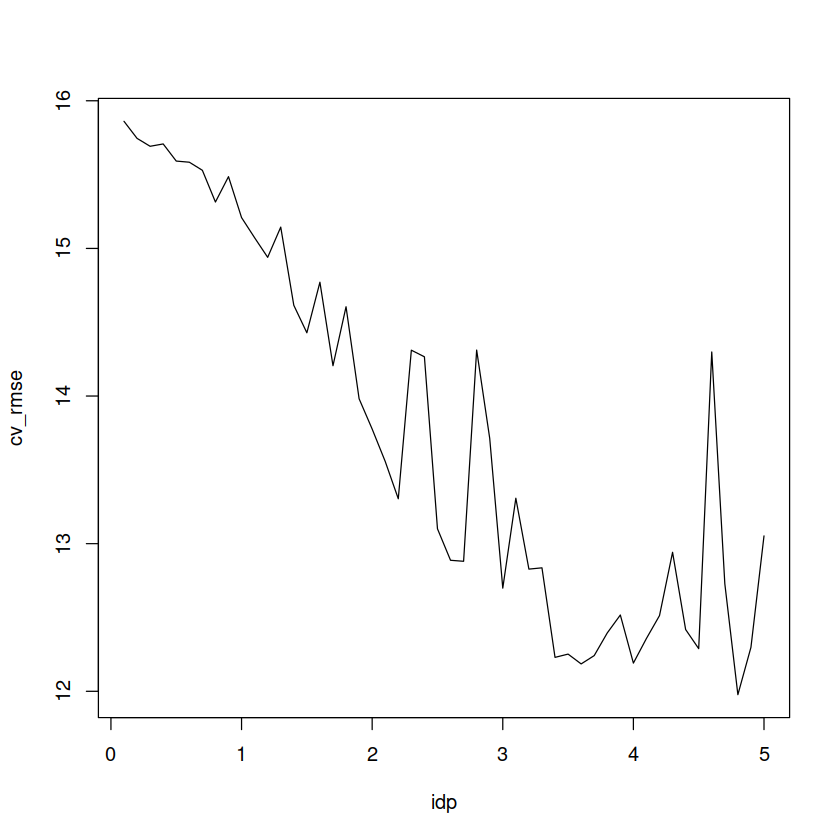

In [29]:
## Evolution de la RMSE en fonction de la pondération appliqué
## à l'inverse distance
#png(file = "test fig.png")
plot(cv_rmse ~ idp, data = powoptim, type='l')
#dev.off()

In [31]:
#############################################################
## 3- ### Quelle qualité pour carte de SOC interpolé avec la
## pondération choisie à l'étape précédente
#############################################################

## La taille de l'échantillon permet de scinder en un échantillon
## d'entraînement (training) et une échantillon de validation (control)
## classiquement 20% pour le controle et 80% pour le training/calibration

## initialisation d'une graine aléatoire afin d'avoir le même résultats
set.seed(102129)

## Selection aléatoire de 20% de mydata 
val_rows <- sample(nrow(mydata), floor(nrow(mydata)*0.2))

##Split de l'échantillon en deux
data.cal <- mydata[-val_rows,]
data.val <- mydata[val_rows,]
dim(data.cal); dim(data.val)

[1] 223  26

[1] 55 26

[inverse distance weighted interpolation]
[inverse distance weighted interpolation]


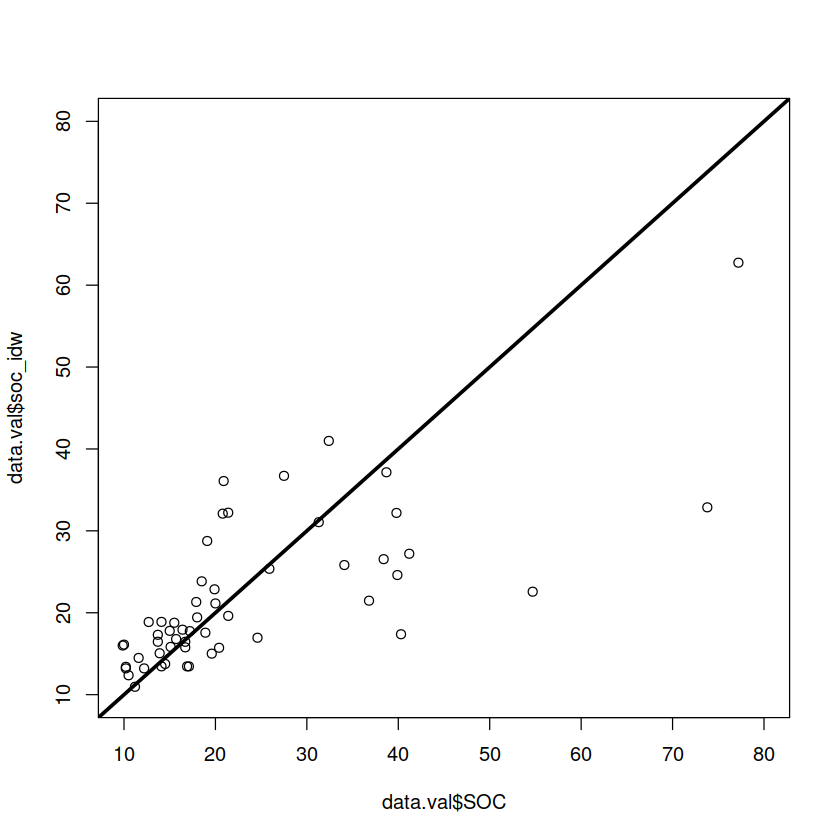

In [35]:
## la valuer idp va dépendre du résultat précédent
## ici je chois arbitrairement 3 mais il vous faudra
## modifier en fonction du résultat précédent
gs <- gstat(
  id = "SOC", formula = SOC ~ 1, data=data.cal,
  set = list(idp = 3)
)

## interpolation sur la grille
soc.idw <- predict(gs,fenaygrid)

## Données interpolées pour les données de validation
data.val$soc_idw <- predict(gs,data.val)$SOC.pred

## Obs vs prédiction
plot(data.val$SOC,data.val$soc_idw, xlim=c(10,80), ylim=c(10,80))
abline(0,1,lwd=3)

In [ ]:
#########################################################################################
## Calculer quelques métriques statistiques pour estimer la qualité de l'interpolation
## Quelles sont les sources potielles d'erreur ? cf. boxplot de la variable SOC
## Que proposez vous pour améliorer les résultats ?
#########################################################################################